<a href="https://colab.research.google.com/github/AvinashPalagani/NN-DL_ICP_8/blob/main/NN_DL_ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model


# size of encoded representations
encoding_dim = 32


# input placeholder
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded- lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
47/47 [==============================] - 5s 26ms/step - loss: 0.5617 - accuracy: 0.0018 - val_loss: 0.4647 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 1s 15ms/step - loss: 0.4278 - accuracy: 0.0038 - val_loss: 0.4044 - val_accuracy: 0.0040
Epoch 3/5
47/47 [==============================] - 1s 17ms/step - loss: 0.3906 - accuracy: 0.0112 - val_loss: 0.3801 - val_accuracy: 0.0050
Epoch 4/5
47/47 [==============================] - 1s 16ms/step - loss: 0.3659 - accuracy: 0.0130 - val_loss: 0.3594 - val_accuracy: 0.0100
Epoch 5/5
47/47 [==============================] - 1s 16ms/step - loss: 0.3492 - accuracy: 0.0097 - val_loss: 0.3469 - val_accuracy: 0.0100


In [3]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 2ms/step


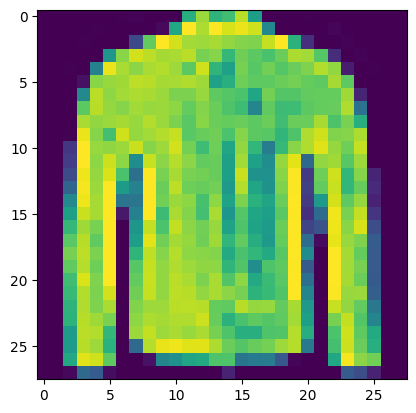

In [4]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

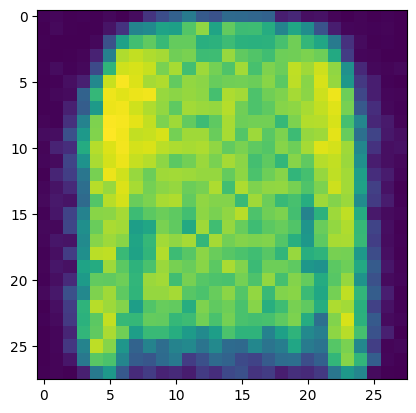

In [5]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [6]:
# ADDING ONE MORE HIDDEN LAYER

input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.3231 - accuracy: 0.0132 - val_loss: 0.2931 - val_accuracy: 0.0173
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2859 - accuracy: 0.0214 - val_loss: 0.2840 - val_accuracy: 0.0265
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2798 - accuracy: 0.0275 - val_loss: 0.2819 - val_accuracy: 0.0309
Epoch 4/5
469/469 [==============================] - 14s 29ms/step - loss: 0.2768 - accuracy: 0.0301 - val_loss: 0.2778 - val_accuracy: 0.0286
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: 0.2750 - accuracy: 0.0331 - val_loss: 0.2765 - val_accuracy: 0.0364


313/313 [==============================] - 4s 12ms/step


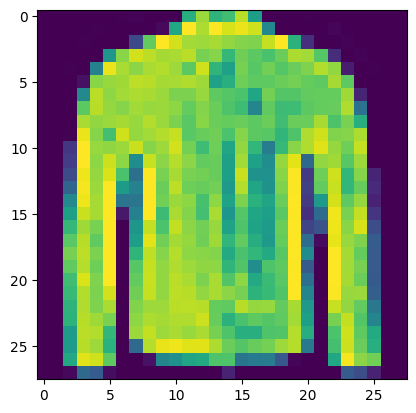

In [7]:
# Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

#predicting on the test data
prediction = autoencoder.predict(x_test)

#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

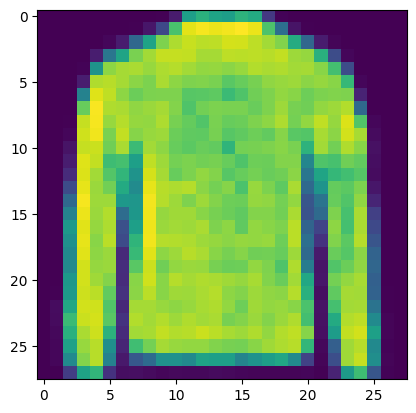

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

In [9]:
# Repeat the question 2 on the denoisening autoencoder

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [10]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 1s 20ms/step - loss: 0.6200 - accuracy: 3.3333e-04 - val_loss: 0.5285 - val_accuracy: 0.0070
Epoch 2/10
24/24 [==============================] - 0s 15ms/step - loss: 0.4862 - accuracy: 0.0030 - val_loss: 0.4490 - val_accuracy: 0.0050
Epoch 3/10
24/24 [==============================] - 0s 14ms/step - loss: 0.4283 - accuracy: 0.0060 - val_loss: 0.4114 - val_accuracy: 0.0040
Epoch 4/10
24/24 [==============================] - 0s 20ms/step - loss: 0.4028 - accuracy: 0.0090 - val_loss: 0.3948 - val_accuracy: 0.0030
Epoch 5/10
24/24 [==============================] - 0s 20ms/step - loss: 0.3890 - accuracy: 0.0085 - val_loss: 0.3824 - val_accuracy: 0.0080
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 0.3775 - accuracy: 0.0107 - val_loss: 0.3712 - val_accuracy: 0.0070
Epoch 7/10
24/24 [==============================] - 1s 21ms/step - loss: 0.3674 - accuracy: 0.0102 - val_loss: 0.3615 - val_accuracy: 0.0080
Epoch 8/1

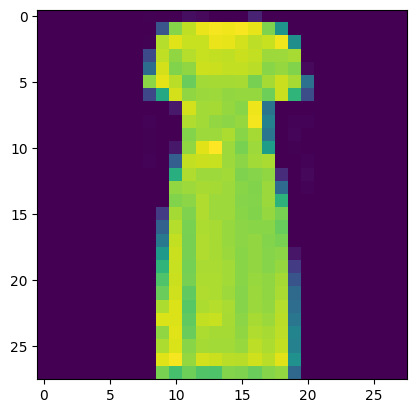

In [12]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

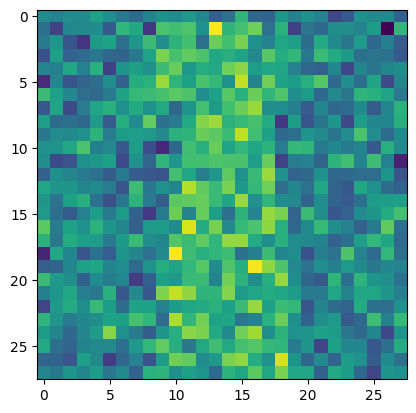

In [13]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

32/32 [==============================] - 0s 2ms/step


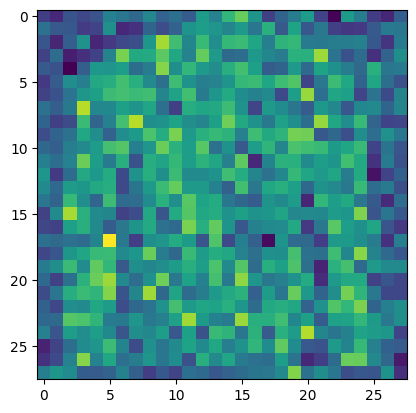

In [14]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

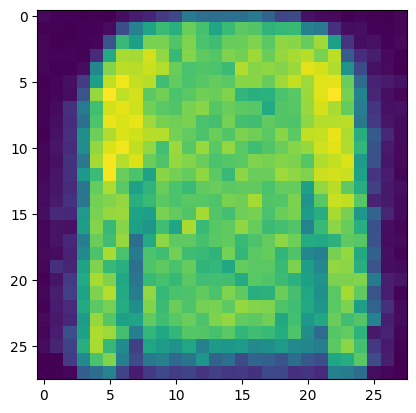

In [15]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

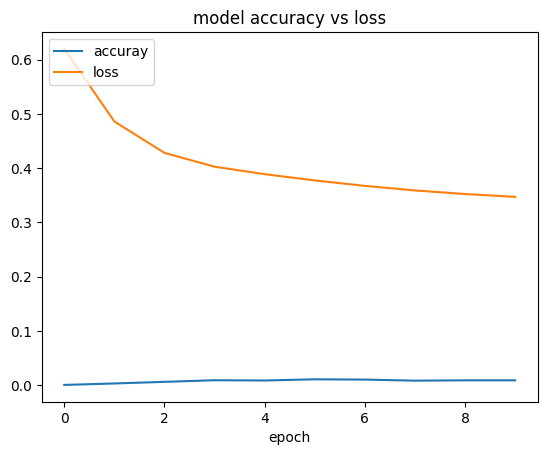

In [16]:
# plot loss and accuracy using the history object

autoencoder.metrics_names

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()
